In [3]:
import pandas as pd
import numpy as np

In [5]:
# 데이터 로드
ori_df = pd.read_csv('./data/2016.csv', encoding='euc-kr')

In [3]:
ori_df.head(10)

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0
5,중부,강간,검거,96.0
6,중부,절도,발생,1204.0
7,중부,절도,검거,485.0
8,중부,폭력,발생,1335.0
9,중부,폭력,검거,1164.0


In [6]:
# numpy는 데이터 타입이 같아야 한다.
# pandas는 데이터 타입이 달라도 상관없다.
# 피벗 데이블을 활용하여 데이터를 재 구성한다. 
# (2015년도 데이타와 2016년도 데이타 구성이 달라 전처리가 필요함)
tmp_df = pd.pivot_table(ori_df, columns=['죄종'], index=['구분'], values=['건수'])
tmp_df.tail()
# 발생 검거가 기본 합산 후 평균으로 바뀌어서 원하는 형태가 않되었다.
# 발생과 검거는 데이터의 성격이 다름

건수                           
죄종     강간    강도   살인      절도      폭력
구분                                  
종로  125.0   4.5  2.0   670.5  1213.0
종암   46.5   5.0  1.5   512.0   873.5
중랑  157.0  14.0  7.5  1371.5  2938.0
중부  118.5   3.0  2.0   844.5  1249.5
혜화   82.5   6.0  2.0   683.5   907.0

In [8]:
# 2016년 데이터에서 발생검거라는 컬럼의 데이터가 발생인 것만 모아서 사본을 받아서 피벗처리
df1 = ori_df[ori_df['발생검거'] == '발생']
df2 = ori_df[ori_df['발생검거'] == '검거']

In [9]:
tmp_df1 = pd.pivot_table(df1, columns=['죄종'], index=['구분'], values=['건수'])
tmp_df1.head(2)

건수                           
죄종     강간    강도   살인      절도      폭력
구분                                  
강남  339.0  24.0  3.0  2438.0  2336.0
강동  160.0  14.0  4.0  1754.0  2530.0

In [10]:
new_col = {'강간': '강간 발생',
          '강도': '강도 발생',
          '살인': '살인 발생',
          '절도': '절도 발생',
          '폭력': '폭력 발생'}
tmp_df1.rename(columns=new_col, inplace=True)
tmp_df1.tail()

건수                            
죄종  강간 발생 강도 발생 살인 발생   절도 발생   폭력 발생
구분                                   
종로  137.0   6.0   4.0   952.0  1291.0
종암   51.0   5.0   2.0   680.0   932.0
중랑  164.0  14.0   8.0  1691.0  3164.0
중부  141.0   3.0   2.0  1204.0  1335.0
혜화  101.0   6.0   2.0   988.0   972.0

In [11]:
tmp_df2 = pd.pivot_table(df2, columns=['죄종'], index=['구분'], values=['건수'])
tmp_df2.tail()

건수                           
죄종     강간    강도   살인      절도      폭력
구분                                  
종로  113.0   3.0  0.0   389.0  1135.0
종암   42.0   5.0  1.0   344.0   815.0
중랑  150.0  14.0  7.0  1052.0  2712.0
중부   96.0   3.0  2.0   485.0  1164.0
혜화   64.0   6.0  2.0   379.0   842.0

In [8]:
# 발생 데이터와 검거 데이터 병합, 병합 방향은? (2015년도 형태를 기준으로 하기위해 행방향)
# 두개의 데이터가 같은형태(shape)을 가지고 있다
# 2015년도 데이터와 동일 형태를 원한다 따라서, concat를 통한 단순 합치기를 할 수 있다.
tmp = pd.concat([tmp_df1, tmp_df2], axis=1)
tmp.tail()
# pd.merge( tmp_df1, tmp_df2, on='구분', how='outer').tail()

건수                                                              
죄종  강간 발생 강도 발생 살인 발생   절도 발생   폭력 발생     강간    강도   살인      절도      폭력
구분                                                                     
종로  137.0   6.0   4.0   952.0  1291.0  113.0   3.0  0.0   389.0  1135.0
종암   51.0   5.0   2.0   680.0   932.0   42.0   5.0  1.0   344.0   815.0
중랑  164.0  14.0   8.0  1691.0  3164.0  150.0  14.0  7.0  1052.0  2712.0
중부  141.0   3.0   2.0  1204.0  1335.0   96.0   3.0  2.0   485.0  1164.0
혜화  101.0   6.0   2.0   988.0   972.0   64.0   6.0  2.0   379.0   842.0

In [9]:
# pandas 데이터프레임의 값 파트 변경 작업
# 데이터의 타입을 정수로 변경
tmp = tmp.astype(np.int32)
tmp.tail()

건수                                                
죄종 강간 발생 강도 발생 살인 발생 절도 발생 폭력 발생   강간  강도 살인    절도    폭력
구분                                                      
종로   137     6     4   952  1291  113   3  0   389  1135
종암    51     5     2   680   932   42   5  1   344   815
중랑   164    14     8  1691  3164  150  14  7  1052  2712
중부   141     3     2  1204  1335   96   3  2   485  1164
혜화   101     6     2   988   972   64   6  2   379   842

In [10]:
# 컬럼명을 2015년도 자료 기준으로 컬럼명 재 정의
# 진행 해 보니, 컬럼명이 동일해서 문제가 발생 
# => 병합 전에 수정 처리 한다. df1 작업을 다시 진행 go back!!!
# 검거 부분은 여기서 수행
new_col = {'강간': '강간 검거',
          '강도': '강도 검거',
          '살인': '살인 검거',
          '절도': '절도 검거',
          '폭력': '폭력 검거'}
tmp.rename(columns=new_col, inplace=True)
tmp.tail()

건수                                                      
죄종 강간 발생 강도 발생 살인 발생 절도 발생 폭력 발생 강간 검거 강도 검거 살인 검거 절도 검거 폭력 검거
구분                                                            
종로   137     6     4   952  1291   113     3     0   389  1135
종암    51     5     2   680   932    42     5     1   344   815
중랑   164    14     8  1691  3164   150    14     7  1052  2712
중부   141     3     2  1204  1335    96     3     2   485  1164
혜화   101     6     2   988   972    64     6     2   379   842

In [11]:
# 중간값 저장(시작 데이터 저장)
tmp.to_csv('./data/2016_start.csv', sep=',', encoding='utf-8')

In [12]:
crime_per_police = pd.read_csv('./data/2016_start.csv', encoding='utf-8')
crime_per_police.head()

,Unnamed: 0,건수,건수.1,건수.2,건수.3,건수.4,건수.5,건수.6,건수.7,건수.8,건수.9
0,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
1,구분,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,강남,339,24,3,2438,2336,269,26,3,1129,2096
3,강동,160,14,4,1754,2530,152,13,5,902,2201
4,강북,217,5,7,1222,2778,159,4,6,672,2482


In [12]:
# 저정의 형태를 좀더 조정하거나, 아니면 데이터를 읽을때 조정하거나 해서 2015와 같은 형식으로 만들 필요가 있다.
# 특정 행부터 데이터를 가져온다 
crime_per_police = pd.read_csv( './data/2016_start.csv',encoding='utf-8', header=1)
crime_per_police.head(3)


,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
0,구분,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
2,강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0


In [13]:
# 특정 행을 삭제
crime_per_police.drop( [0], inplace=True )
crime_per_police.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
1,강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
2,강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0


In [14]:
# 특정 컬럼을 인덱스로 설정
crime_per_police.set_index( '죄종', inplace=True )
crime_per_police.head(2)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
죄종,,,,,,,,,,
강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0


In [16]:
# 타입 보정
crime_per_police.astype(np.int32, inplace=True).tail()
crime_per_police.head(2)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
죄종,,,,,,,,,,
강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0


In [14]:
##### 주소 <-> gps값 , 지형지물명 <-> 주소및 위치정보 획득 : 지오코더 (geocoder)
##### kakao api 사용=>계정등록=>앱생성=>인증키 발급(restful  key)
##### dev.kakao.com
##### 내 앱 만들기 -> 이름 입력 -> 다음 클릭 -> Rest API 키 값 확인
##### 키 확인은 크롬 -> 포트스맨에서 할 수 있다. (크롬 좌측 상단에 앱 아이콘 클릭)
##### 네이버 json 형식을 지원 하지 않았음. 현재 확인 안해봄...

# - KAKAO_API_KEY='5175c0a009281f3d39afe4b7dcaa6d3d'
# - https://dapi.kakao.com/v2/local/search/keyword.json?query=서울 중부 경찰서&category_group_code=PO3

'''
curl -v -X GET "https://dapi.kakao.com/v2/local/search/category.json?category_group_code=PM9&rect=127.0561466,37.5058277,127.0602340,37.5142554" \
-H "Authorization: KakaoAK kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk"
'''

'\ncurl -v -X GET "https://dapi.kakao.com/v2/local/search/category.json?category_group_code=PM9&rect=127.0561466,37.5058277,127.0602340,37.5142554" -H "Authorization: KakaoAK kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk"\n'

### 리턴된 데이타의 documents[0] 데이터를 가져온다.
'''
{
    "documents": [
        {
            "address_name": "서울 중구 저동2가 62-1",
            "category_group_code": "PO3",
            "category_group_name": "공공기관",
            "category_name": "사회,공공기관 > 행정기관 > 경찰서",
            "distance": "",
            "id": "11151738",
            "phone": "182",
            "place_name": "서울중부경찰서",
            "place_url": "http://place.map.daum.net/11151738",
            "road_address_name": "서울 중구 수표로 27",
            "x": "126.98959193048435",
            "y": "37.563620722687844"
        },...
    "meta": {
        "is_end": true,
        "pageable_count": 8,
        "same_name": {
            "keyword": "서울 중부 경찰서",
            "region": [],
            "selected_region": ""
        },
        "total_count": 8
    }
}'''

In [15]:
# API를 이용한 http통신을 통해서 획득
# requests, urllib, beautifulSop, Selenium등등이 웹 크롤링 기술 대상 모듈이다.
import requests
KAKAO_API_KEY='5175c0a009281f3d39afe4b7dcaa6d3d'
url = '''
https://dapi.kakao.com/v2/local/search/keyword.json?query={0}&category_group_code=PO3
'''.format('서울 중부 경찰서')
headers={'Authorization': 'KakaoAK {0}'.format(KAKAO_API_KEY)}
res = requests.get(url, headers=headers)

In [16]:
res = res.json()

In [17]:
print(res['documents'][0]['address_name'],
res['documents'][0]['x'],
res['documents'][0]['y'],
res['documents'][0]['place_name'])

서울 중구 저동2가 62-1 126.98959144113 37.5636199296203 서울중부경찰서


### 범죄 통계 데이터에서 관할서에 대한 정보 추출
- 반복작업을 통해 kakao API를 활용 하여 주소, 위도, 경도등 획득

In [18]:
# 검색어를 던져서 응답 데이터중에 주소, 위도, 경도 질의어 리턴 함수
def net_get_geo_coder(query):
    KAKAO_API_KEY='5175c0a009281f3d39afe4b7dcaa6d3d'
    url = '''
    https://dapi.kakao.com/v2/local/search/keyword.json?query={0}&category_group_code=PO3
    '''.format(query)
    headers={'Authorization': 'KakaoAK {0}'.format(KAKAO_API_KEY)}
    # API 쿼리 수행
    res = requests.get(url, headers=headers)
    res = res.json()
    # 데이터 추출 => 리턴 값이 하나 이상이면 튜플로 리턴이 된다!!!
    # 데이터 리턴 : 주소, 위도, 경도, 질의어 순으로 튜플형태로 리턴
    return res['documents'][0]['address_name'], res['documents'][0]['x'], res['documents'][0]['y'], res['documents'][0]['place_name']

In [19]:
# 반복해서 관할서의 이름을 완성하여 출력(print)하시오
# 진행율을 볼 수 있는 라이브러리.
# pip install tqdm
from tqdm import tqdm_notebook
# 경찰서 정보를 리스트로 담아 놓는다
police_station_info = []

# 경찰서 이름 개수만큼 반복
for name in tqdm_notebook(crime_per_police.index):
# for name in crime_per_police_index:
    # 검색어 획득
    query = '서울{0}경찰서'.format(name)
    # print('서울{0}경찰서'.format(name))
    #result = net_get_geo_coder(query)
    #print(result)
    police_station_info.append(net_get_geo_coder(query))

In [20]:
# 위도만 출력해서 리스트로 출력 -> df에 컬럼 삽입을 해야 하므로
lat = []
for station in police_station_info:
    #print(station[1])
    lat.append(station[1])
# 리스트 내포 코딩 압축...(?)
lat = [station[1] for station in police_station_info]

In [21]:
# addrs, lats, lngs, names 추축
addrs = [station[0] for station in police_station_info]
lats = [station[1] for station in police_station_info]
lngs = [station[2] for station in police_station_info]
names = [station[3] for station in police_station_info]

In [22]:
crime_per_police.tail()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
죄종,,,,,,,,,,
종로,137.0,6.0,4.0,952.0,1291.0,113.0,3.0,0.0,389.0,1135.0
종암,51.0,5.0,2.0,680.0,932.0,42.0,5.0,1.0,344.0,815.0
중랑,164.0,14.0,8.0,1691.0,3164.0,150.0,14.0,7.0,1052.0,2712.0
중부,141.0,3.0,2.0,1204.0,1335.0,96.0,3.0,2.0,485.0,1164.0
혜화,101.0,6.0,2.0,988.0,972.0,64.0,6.0,2.0,379.0,842.0


In [23]:
# crime_per_police 정보에 자치구 정보가 없다 -> 자치구 : XXX구 데이터 추가 필요하다
# addrs -> 구를 획득 => 컬럼 추가
tmp_gu = []
#for addr in addrs:
#    if addr:
#    #print(addr)
#    tmp_g.addpend(addr.split(' ')[1])
#    #print(tmp_g)
# 리스트 내포 => 코딩 축약
tmp_gu = [addr.split()[1] for addr in addrs if addr]

In [24]:
crime_per_police['자치구'] = tmp_gu
# 키 역활을 담담할 자치구 컬럼의 unique 조사
# 자치구 25개이나 받아온 데이타의 unique를 돌려보니 23개이다
# 2개의 경찰서가
# 경찰서의 주소 데이타를 기준으로 자치구를 추출하다보니
# 경찰서의 위치와 실제 소속 자치구가 일치하지 않는 관할서가 있다.
len(crime_per_police['자치구'].unique())

25

In [25]:
# 금천 -> 관악구 => 금천구 대체 : 데이터 수정
# 강서 -> 양천구 => 강서구 대체 : 데이터 수정
# crime_per_police[crime_per_police['자치구']=='양천구']
# 데이터 보정 (해당 분야의 지식이 있을 경우 유리 (보정사항체크하는데))
# 금천 -> 관악구 => 금천구 대체,  수행
# 강서 -> 양천구 => 강서구 대체
# 표현이 복잡해짐
#crime_per_police[ crime_per_police['자치구']=='양천구'  ]
crime_per_police.loc['강서', '자치구']='강서구'
crime_per_police.loc['금천', '자치구']='금천구'

In [26]:
# 현재 작업 저장됀 데이터 저장 (crime_analysis_mid_save.csv)
crime_per_police.to_csv('./data/crime_analysis_mid_save.csv', sep=',', encoding='utf-8')

In [27]:
# 데이타 로드
crime_per_police_raw = pd.read_csv('./data/crime_analysis_mid_save.csv', encoding='utf-8')

In [28]:
# 피벗 테이블을 이용하여 구별 관할서 데이터를 합산
# (행이 총 25개가 나와야 한다.)
crime_per_police_raw.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구
0,강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0,강남구
1,강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0,강동구


In [29]:
crime_anal = pd.pivot_table(crime_per_police_raw, index='자치구', aggfunc=np.sum, fill_value=0)
crime_anal.tail()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
자치구,,,,,,,,,,
용산구,214,251,10,9,4,4,599,1489,2008,2384
은평구,142,156,7,9,6,6,890,1666,2308,2664
종로구,177,238,9,12,2,6,768,1940,1977,2263
중구,148,198,7,8,3,3,914,2150,1996,2225
중랑구,150,164,14,14,7,8,1052,1691,2712,3164


In [30]:
# 검거율 = 검거 / 발생 * 100
# 5대 범죄에 대한 검거율을 각각 추가한다 
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생'] * 100
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생'] * 100
crime_anal.head(2)
# 수치가 100% 넘는 데이터들은 원천 통계데이터의 이전년도 누락분이 예상된다

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,,,,,,
강남구,413,516,42,39,5,5,1918,3587,3527,4002,88.130935,53.470867,100.0,107.692308,80.03876
강동구,152,160,13,14,5,4,902,1754,2201,2530,86.996047,51.425314,125.0,92.857143,95.00000


In [31]:
# 검거 컬럼을 모두 제거
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['절도 검거']
del crime_anal['살인 검거']
del crime_anal['폭력 검거']

In [32]:
crime_anal.head(2)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,516,39,5,3587,4002,88.130935,53.470867,100.0,107.692308,80.03876
강동구,160,14,4,1754,2530,86.996047,51.425314,125.0,92.857143,95.00000


In [33]:
# 전년도 데이터가 실수(의도) 들어가 잇어서 100을 초과하는 데이터 -> 100 일괄 정리
# 사건 발생 연도와 검거 년도가 달라서 나오는 오류일수도 있다
crime_anal.columns
target_columns = ['폭력검거율', '절도검거율', '살인검거율', '강도검거율', '강간검거율']
tmp = crime_anal.copy()
for col in target_columns:
    # loc은 행 전체를 전제 한다, 컬럼까지 지정을 해야 
    # 해당 셀을 값만 변경이 됀다.
    # 해당 컬럼의 값이 100이 넘으면 -> True 그 행의 컬럼값을 100으로 바꿔라
    crime_anal.loc[crime_anal[col] > 100, col] = 100
crime_anal.tail()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
용산구,251,9,4,1489,2384,84.228188,40.228341,100.000000,100.000000,85.258964
은평구,156,9,6,1666,2664,86.636637,53.421369,100.000000,77.777778,91.025641
종로구,238,12,6,1940,2263,87.361909,39.587629,33.333333,75.000000,74.369748
중구,198,8,3,2150,2225,89.707865,42.511628,100.000000,87.500000,74.747475
중랑구,164,14,8,1691,3164,85.714286,62.211709,87.500000,100.000000,91.463415


In [34]:
# 컬럼명 변경
crime_anal.rename(columns={'강간 발생': '강간', '강도 발생': '강도', '살인 발생': '살인', '절도 발생': '절도', '폭력 발생': '폭력'}, inplace=True)
crime_anal.tail()

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
용산구,251,9,4,1489,2384,84.228188,40.228341,100.000000,100.000000,85.258964
은평구,156,9,6,1666,2664,86.636637,53.421369,100.000000,77.777778,91.025641
종로구,238,12,6,1940,2263,87.361909,39.587629,33.333333,75.000000,74.369748
중구,198,8,3,2150,2225,89.707865,42.511628,100.000000,87.500000,74.747475
중랑구,164,14,8,1691,3164,85.714286,62.211709,87.500000,100.000000,91.463415


### 데이터 조정 작업
- 살인사건은 5, 4 한자리수, 절도, 폭력은 4자리수
- 비교, 비율을 볼때는 숫자를 같은 범위에 두고 비교하는 것이 명확하고 직관적으로 보인다.
- **최대값을 1로**, **최소값을 0으로** 두고 정규화 진행(nomalize) -> 종합적으로 비교
### 데이타 정규와 작업을 하는 이유
- 비교, 비율을 볼때 같은 범위에 값을 두고 비교하는 것이 명확해지고 직관적으로 보인다.
- 시각화를 진행하면서도 같은 적용을 받는다

데이타 정규화는 sklearn (사이킷런) 라이브러리를 사용 한다

In [35]:
# 파이썬의 머신러닝 scikit-learn에 있는 전처리 도구를 사용하여 최대, 최소값을 활용 정규화 진행
from sklearn import preprocessing

In [36]:
# 대상
crime_anal.columns

Index(['강간', '강도', '살인', '절도', '폭력', '폭력검거율', '절도검거율', '살인검거율', '강도검거율',
       '강간검거율'],
      dtype='object')

In [37]:
col = ['강간', '강도', '살인', '절도', '폭력']
# 대상 컬럼의 데이터 획득
x = crime_anal[col].values
# 전처리 모듈의 최대, 최소 스캐너 함수
min_max_scaler = preprocessing.MinMaxScaler()
# min_max_scaler 함수 사용 데이터 받음
x_sacled = min_max_scaler.fit_transform(x)

In [38]:
# 데이터 프레임 생성
crime_anal_normal = pd.DataFrame(x_sacled, columns=col, index=crime_anal.index)
crime_anal_normal.tail()

,강간,강도,살인,절도,폭력
자치구,,,,,
용산구,0.356796,0.166667,0.1,0.228960,0.368216
은평구,0.126214,0.166667,0.3,0.294010,0.477548
종로구,0.325243,0.250000,0.3,0.394708,0.320968
중구,0.228155,0.138889,0.0,0.471885,0.306130
중랑구,0.145631,0.305556,0.5,0.303197,0.672784


In [39]:
# 컬럼 추가를 1개가 아닌 5개를 동시에 처리하는 표현식
crime_anal_normal[target_columns] = crime_anal[target_columns]
crime_anal_normal.tail()
# 단순비교를 위해서만 정규화를 한개 아니라 => 시각화를 위해서도 목적이 있다

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
용산구,0.356796,0.166667,0.1,0.228960,0.368216,84.228188,40.228341,100.000000,100.000000,85.258964
은평구,0.126214,0.166667,0.3,0.294010,0.477548,86.636637,53.421369,100.000000,77.777778,91.025641
종로구,0.325243,0.250000,0.3,0.394708,0.320968,87.361909,39.587629,33.333333,75.000000,74.369748
중구,0.228155,0.138889,0.0,0.471885,0.306130,89.707865,42.511628,100.000000,87.500000,74.747475
중랑구,0.145631,0.305556,0.5,0.303197,0.672784,85.714286,62.211709,87.500000,100.000000,91.463415


In [40]:
# step1의 결과를 가져오기 (서울 인구, cctv 통계 저장 자료)
file_path = '../step1_pandas_basic_matplotlib_analysis_csv/data/cctv_pop_analysis_result.csv'
result_CCTV = pd.read_csv(file_path, encoding='utf-8', index_col='자치구')
result_CCTV.head()

,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
자치구,,,,,,,,,,
강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941,0.586713,1561.929921
강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575,0.231095,-541.597345
강북구,831,125.203252,326063,322385,3678,57401,1.128003,17.604267,0.254859,-600.298704
강서구,911,134.793814,606981,600257,6724,78042,1.107778,12.857404,0.150087,-824.785298
관악구,2109,149.290780,521960,504048,17912,71317,3.431681,13.663308,0.404054,465.368835


In [41]:
# result_CCTV의 데이터 중 소계와 인구수를 가져와서 crime_anal_normal에 CCTV, 인구수
# 라는 컬럼명으로 데이터를 추가 후 샘플로 상위 2개만 출력 하시오 => 2줄
# 기본적으로 순서가 다를 경우 (index가 구성은 같고 순서가 다른 경우는 머지함수를 사용해야 한거나
# 정령 후 적용해야 한다)
crime_anal_normal[['CCTV', '인구수']] = result_CCTV[['소계', '인구']]
crime_anal_normal.tail()

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수
자치구,,,,,,,,,,,,
용산구,0.356796,0.166667,0.1,0.228960,0.368216,84.228188,40.228341,100.000000,100.000000,85.258964,2096,245245
은평구,0.126214,0.166667,0.3,0.294010,0.477548,86.636637,53.421369,100.000000,77.777778,91.025641,2108,489045
종로구,0.325243,0.250000,0.3,0.394708,0.320968,87.361909,39.587629,33.333333,75.000000,74.369748,1619,163569
중구,0.228155,0.138889,0.0,0.471885,0.306130,89.707865,42.511628,100.000000,87.500000,74.747475,1023,135427
중랑구,0.145631,0.305556,0.5,0.303197,0.672784,85.714286,62.211709,87.500000,100.000000,91.463415,916,410296


In [42]:
# 발생 검수 합산 -> 범죄 컬럼 추가
# 위에 col 사용
# 해당 컬럼의 값들을 획득 -> 행방향으로 합산값을 -> 컬럼 추가
crime_anal_normal['범죄'] = np.sum(crime_anal_normal[col], axis=1)
crime_anal_normal.tail()

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,범죄
자치구,,,,,,,,,,,,,
용산구,0.356796,0.166667,0.1,0.228960,0.368216,84.228188,40.228341,100.000000,100.000000,85.258964,2096,245245,1.220638
은평구,0.126214,0.166667,0.3,0.294010,0.477548,86.636637,53.421369,100.000000,77.777778,91.025641,2108,489045,1.364438
종로구,0.325243,0.250000,0.3,0.394708,0.320968,87.361909,39.587629,33.333333,75.000000,74.369748,1619,163569,1.590919
중구,0.228155,0.138889,0.0,0.471885,0.306130,89.707865,42.511628,100.000000,87.500000,74.747475,1023,135427,1.145060
중랑구,0.145631,0.305556,0.5,0.303197,0.672784,85.714286,62.211709,87.500000,100.000000,91.463415,916,410296,1.927168


In [43]:
# 검거율 총계 => 컬럼명 검거율
#crime_anal_normal.columns
#col2 = ['폭력검거율', '절도검거율', '살인검거율', '강도검거율', '강간검거율']
# 위에 target_columns 사용
crime_anal_normal['검거율'] = np.average(crime_anal_normal[target_columns], axis=1)
crime_anal_normal.tail()

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,범죄,검거율
자치구,,,,,,,,,,,,,,
용산구,0.356796,0.166667,0.1,0.228960,0.368216,84.228188,40.228341,100.000000,100.000000,85.258964,2096,245245,1.220638,81.943099
은평구,0.126214,0.166667,0.3,0.294010,0.477548,86.636637,53.421369,100.000000,77.777778,91.025641,2108,489045,1.364438,81.772285
종로구,0.325243,0.250000,0.3,0.394708,0.320968,87.361909,39.587629,33.333333,75.000000,74.369748,1619,163569,1.590919,61.930524
중구,0.228155,0.138889,0.0,0.471885,0.306130,89.707865,42.511628,100.000000,87.500000,74.747475,1023,135427,1.145060,78.893394
중랑구,0.145631,0.305556,0.5,0.303197,0.672784,85.714286,62.211709,87.500000,100.000000,91.463415,916,410296,1.927168,85.377882


### 향상된 시각화 도구
- seaborn
- 칼라맵을 적극적 사용
- 산점도 표현 (데이터간의 성질 비교, 이상유무 확인)

In [44]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# 시각화 결과물을 주피터에 내장 시키기 위해 
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

In [45]:
crime_anal_normal.columns

Index(['강간', '강도', '살인', '절도', '폭력', '폭력검거율', '절도검거율', '살인검거율', '강도검거율',
       '강간검거율', 'CCTV', '인구수', '범죄', '검거율'],
      dtype='object')

C:\Users\seonjo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


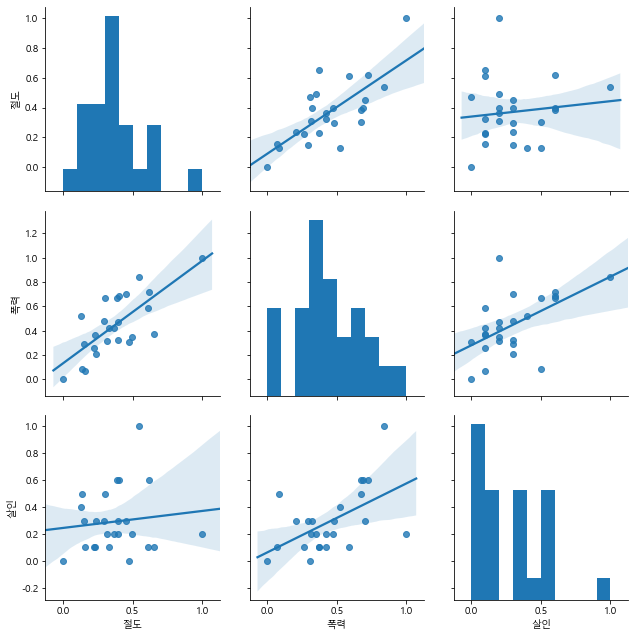

In [46]:
# 산점도를 그려서 변수간 관계성 확인
sns.pairplot(crime_anal_normal, vars=['절도', '폭력', '살인'], kind='reg', size=3)
plt.show()

C:\Users\seonjo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


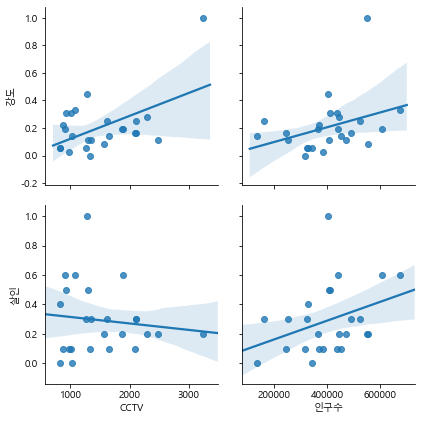

In [47]:
sns.pairplot(crime_anal_normal, x_vars=['CCTV', '인구수'], y_vars=['강도', '살인'], kind='reg', size=3)
plt.show()

C:\Users\seonjo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


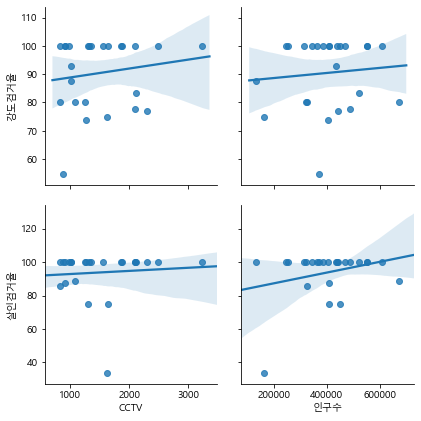

In [48]:
# 100% 데이터들 때문에 관계성 파악이 불가능하다
sns.pairplot(crime_anal_normal, x_vars=['CCTV', '인구수'], y_vars=['강도검거율', '살인검거율'], kind='reg', size=3)
plt.show()

In [49]:
crime_anal_normal.head()

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,범죄,검거율
자치구,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,4.200000,84.328112
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,1.293053,85.255701
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889,831,326063,1.382723,76.664569
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,2.297014,85.623335
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578,2109,521960,2.234246,78.710965


In [50]:
# 검거율의 최고값 100이라고 한정하고, 나머지 정렬
tmp_max = crime_anal_normal['검거율'].max()
crime_anal_normal['검거율'] = crime_anal_normal['검거율'] / tmp_max * 100

In [51]:
# 정렬해서 확인
crime_anal_normal_sort = crime_anal_normal.sort_values(by='검거율', ascending=False)
crime_anal_normal_sort

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,범죄,검거율
자치구,,,,,,,,,,,,,,
도봉구,0.046117,0.055556,0.0,0.000000,0.000000,90.839695,56.812933,100.000000,100.000000,98.373984,825,344096,0.101672,100.000000
성동구,0.000000,0.000000,0.1,0.158030,0.069504,86.967264,69.135802,100.000000,100.000000,75.000000,1327,316068,0.327534,96.654113
동대문구,0.208738,0.194444,0.2,0.394708,0.468957,89.969720,55.206186,100.000000,100.000000,83.157895,1870,364527,1.466848,96.033239
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,2.297014,95.984559
중랑구,0.145631,0.305556,0.5,0.303197,0.672784,85.714286,62.211709,87.500000,100.000000,91.463415,916,410296,1.927168,95.709404
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,1.293053,95.572437
금천구,0.172330,0.111111,0.3,0.146270,0.293635,88.736890,51.740506,100.000000,100.000000,81.714286,1348,252752,1.023346,94.656164
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,4.200000,94.532602
노원구,0.133495,0.083333,0.2,0.364204,0.419758,84.419714,39.849219,100.000000,100.000000,89.308176,1566,553177,1.200791,92.724761


In [52]:
target_columns

['폭력검거율', '절도검거율', '살인검거율', '강도검거율', '강간검거율']

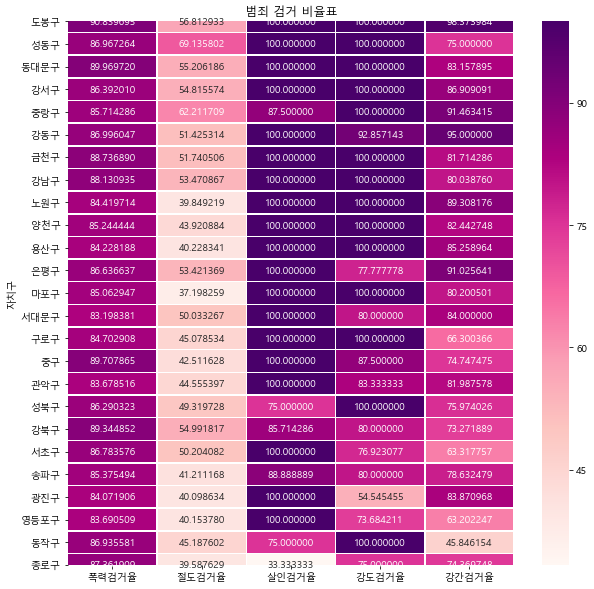

In [53]:
# 검거율 기준 정렬 : crime_anal_normal_sort
plt.figure(figsize=(10, 10))
sns.heatmap(crime_anal_normal_sort[target_columns], annot=True, fmt='f', linewidths=0.5, cmap='RdPu')
plt.title('범죄 검거 비율표')
plt.show()

In [54]:
# 5대 범죄 발생 통계
col

['강간', '강도', '살인', '절도', '폭력']

In [55]:
# 5는 5대 범죄의 최대치(1.0)의 합산값의 최대치이다
crime_anal_normal['범죄'] = crime_anal_normal['범죄'] / 5
crime_anal_normal_sort      =  crime_anal_normal.sort_values(by='범죄', ascending=False)

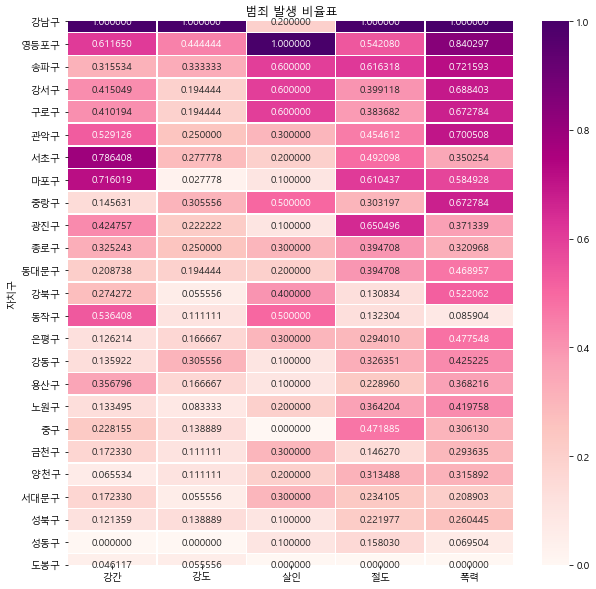

In [56]:
plt.figure( figsize=(10,10) )
sns.heatmap(  crime_anal_normal_sort[ col ], annot=True, fmt='f', linewidths=0.5, cmap='RdPu')
plt.title('범죄 발생 비율표')
plt.show()

In [57]:
# 데이터 저장
crime_anal_normal.to_csv('./data/crime_mid.csv', sep=',', encoding='utf-8')

### 지도 시각화
- folium
- 시군구 gps 경계선 데이터 -> json 형태 제공

In [21]:
import json
geo_json = './data/seoul_gu.json'
geo_seoul_gu = json.load(open(geo_json, encoding='utf-8'))
geo_seoul_gu

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [22]:
crime_anal_normal = pd.read_csv('./data/crime_mid.csv', encoding='utf-8')
crime_anal_normal.set_index('자치구', inplace=True)
crime_anal_normal.head()

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,범죄,검거율
자치구,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,0.840000,94.532602
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,0.258611,95.572437
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889,831,326063,0.276545,85.941698
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,0.459403,95.984559
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578,2109,521960,0.446849,88.235727


In [23]:
import folium
map = folium.Map(location=[37.5402651, 126.975206], zoom_start=10)
# 자치구별 표시 => 범죄 컬럼 기준 칼라맵 사용
map.choropleth(geo_data=geo_seoul_gu, 
               data=crime_anal_normal['범죄'], 
               columns=[crime_anal_normal.index, crime_anal_normal['범죄']], 
               key_on='feature.id',
               fill_color='YlGn', legend_name='자치구별 범죄발생 비율')
map

In [24]:
# 인구대비 범죄비율 시각화, 백만명 기준
tmp_pop_crime_rate = crime_anal_normal['범죄'] / crime_anal_normal['인구수'] * 1000000

map = folium.Map(location=[37.5402651, 126.975206], zoom_start=10)
# 자치구별 표시 => 범죄 컬럼 기준 칼라맵 사용
map.choropleth(geo_data=geo_seoul_gu, 
               data=tmp_pop_crime_rate, 
               columns=[crime_anal_normal.index, tmp_pop_crime_rate], 
               key_on='feature.id',
               fill_color='PuRd', legend_name='인구대비 범죄율(백만명기준)')
map

In [25]:
# 인구대비 검거비율 시각화, 백만명 기준
map = folium.Map(location=[37.5402651, 126.975206], zoom_start=10)
# 자치구별 표시 => 범죄 컬럼 기준 칼라맵 사용
map.choropleth(geo_data=geo_seoul_gu, 
               data=crime_anal_normal['검거율'], 
               columns=[crime_anal_normal.index, crime_anal_normal['검거율']], 
               key_on='feature.id',
               fill_color='YlGn', legend_name='자치구별검거비율')
map

### 관할서별 검거현황 + 자치구별 범죄현황

In [26]:
crime_per_police_raw.head()

NameError: name 'crime_per_police_raw' is not defined

In [27]:
# 위도 경도 추가
crime_per_police_raw['lat'] = lats
crime_per_police_raw['lng'] = lngs
crime_per_police_raw.head()

NameError: name 'lats' is not defined

In [28]:
# 관할서별 검거 현황
col = ['강간 검거', '강도 검거', '살인 검거', '절도 검거', '폭력 검거']
tmp = crime_per_police_raw[col] / crime_per_police_raw[col].max()
# 합산 및 추가
crime_per_police_raw['검거'] = np.sum(tmp, axis=1)
crime_per_police_raw.head()

NameError: name 'crime_per_police_raw' is not defined

In [29]:
# 서울 지도에 관할서 마킹
map = folium.Map( location=[37.5442692,126.9665101], zoom_start=11 )
# 관할서 마킹
#print( type(crime_per_police_raw['lat'][0]) )
#  crime_per_police_raw.index => 0 ~ 24
for idx in crime_per_police_raw.index:
    folium.Marker( [ float(crime_per_police_raw['lat'][idx]),
                                       float(crime_per_police_raw['lng'][idx]) ], 
                                    popup='서울%s경찰서'%crime_per_police_raw[ '죄종' ][idx] ).add_to(map)

map

NameError: name 'crime_per_police_raw' is not defined

In [67]:
# 서울지도에 관할서 마킹
map = folium.Map(location=[37.5442692, 126.9665101], zoom_start=11)

for idx in crime_per_police_raw.index:
    gps = [float(crime_per_police_raw['lat'][idx]), float(crime_per_police_raw['lng'][idx])]
    # 마커 처리
    folium.Marker(gps,
                 popup='서울%s경찰서'%crime_per_police_raw['죄종'][idx]
                 ).add_to(map)
    # 써클 처리
    # 검거율표시 -> 원이 클 수록 검거율이 높다
    folium.CircleMarker(gps,
                       radius=crime_per_police_raw['검거'][idx] * 10,
                       color='#547544',
                       fill_color='#333333').add_to(map)
    # 다각형 (3, 4, 6, 8,...)
#    folium.RegularPolygonMarker(gps,
#                               radius=crime_per_police_raw['검거'][idx] * 10),
#                               color='#547544',
#                               fill_color='#333333').add_to(map)
map

In [68]:
# 서울 지도에 관할서 마킹
map = folium.Map( location=[37.5442692,126.9665101], zoom_start=11 )

# 자치구별 표시 => 범죄 컬럼 기준 칼라맵 사용
#tmp_pop_crime_rate = crime_anal_normal['범죄'] / crime_anal_normal['인구수'] * 1000000
map.choropleth( geo_data=geo_seoul_gu,  
               data=crime_anal_normal['범죄'],
               columns = [ crime_anal_normal.index,  crime_anal_normal['범죄'] ],
               key_on='feature.id',
               fill_color='PuRd',
               legend_name='자치구별 범죄비율'
              )


# 관할서 마킹
#print( type(crime_per_police_raw['lat'][0]) )
#  crime_per_police_raw.index => 0 ~ 24
for idx in crime_per_police_raw.index:
    gps = [ float(crime_per_police_raw['lat'][idx]), float(crime_per_police_raw['lng'][idx]) ]
    # 관할서 마킹
    folium.Marker(gps , popup='서울%s경찰서'%crime_per_police_raw[ '죄종' ][idx] ).add_to(map)
    # 검거율 표시 -> 원이 클수록 검거율이 높다
    folium.CircleMarker( gps, 
                        radius=crime_per_police_raw[ '검거' ][idx] * 10 , 
                        color='#547544', 
                        fill_color='#333333' ).add_to( map )
    # 다각형  (3,4, 6, 8, ...)
    #folium.RegularPolygonMarker( gps,  radius=crime_per_police_raw[ '검거' ][idx] * 10 , 
    #                                                               color='#547544', fill_color='#333333',
    #                                                               number_of_sides=8).add_to( map )

map

- 범죄율이 높을수록 붉은색을띤다
- 검거율이 높을수록 원이 커짐
- 